In [16]:
from dataset_preprocesser import MVTecAD2
from torchvision                        import transforms
from matplotlib import pyplot as plt
import yaml

In [3]:
# Load configuration from config.yaml
config_path = "/home/jaspinder/Github/Anomaly_Detection/config.yaml"
with open(config_path, "r") as file:
    config = yaml.safe_load(file)

OUTPUT_PATH = config.get("OUTPUT_PATH", "")

In [7]:
transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])

In [10]:
train_dataset = MVTecAD2("all","test",OUTPUT_PATH,transform=transform)

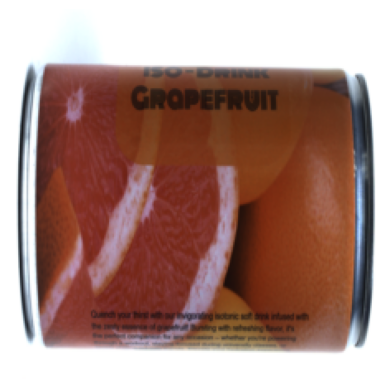

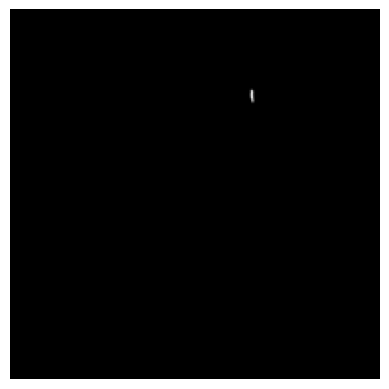

In [17]:
image = train_dataset.__getitem__(310)["sample"]
plt.imshow(image.permute(1, 2, 0))
plt.axis('off')
plt.show()
image = train_dataset.__getitem__(310)["ht"]
plt.imshow(image.squeeze(0), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),  # (B, 64, 112, 112)
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),  # (B, 128, 56, 56)
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),  # (B, 256, 28, 28)
            nn.ReLU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),  # (B, 128, 56, 56)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  # (B, 64, 112, 112)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  # (B, 3, 224, 224)
            nn.Sigmoid(),  # Normalize output to [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate the autoencoder
autoencoder = Autoencoder()

# Define a loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)

# Example usage
# Assuming `image` is a batch of images with shape (B, 3, 224, 224)
output = autoencoder(image)
loss = criterion(output, image)
loss.backward()
optimizer.step()